# Material de aula  - Redes Neurais e Deep Learning

In [ ]:
#Neste versão o bias não é incluido dentro do vetor de pesos e os calculos são separados


## <center> Perceptron Multicamadas e Classificação de Padrões - LABORATÓRIO 03 </center>

### A padronização para a saída, representando o conservante a ser aplicado, ficou definida da seguinte forma:

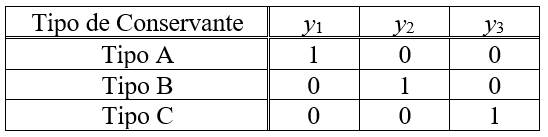

In [2]:
#CÉLULA MLP-LIB-01
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [3]:
#CÉLULA MLP-LIB-02
def loadDataFile(filename) :
    '''
    Esta função faz o carregamento de dados de um arquivo separado por virgulas (csv)
    
    Parametros
    -----------
    filename -> nome do arquivo de dados em formato csv
    
    
    Retorno
    -----------  
    dataframe contendo os dados do arquivo formatados numericamente.
    '''
    
    dfFile = pd.read_csv(filename, sep=';', decimal=',', thousands='.')
    return dfFile

In [4]:
#CÉLULA MLP-LIB-03
def sigmoid(z) :
    '''
    Esta função faz o cálculo da função de ativação do tipo sigmoide
    
    Parametros
    -----------
    z -> valor do parametro a ser calculado em f(z)
    
    Retorno
    -----------  
    valor da função sigmoide correspondente ao parametro z
    '''    
    return 1/(1+np.exp(-z))

In [5]:
#CÉLULA MLP-LIB-04
def tanh_function(z) :
    '''
    Esta função faz o cálculo da função de ativação do tipo tangente hiperbolica
    
    Parametros
    -----------
    z -> valor do parametro a ser calculado em f(z)
    
    Retorno
    -----------  
    valor da função tangente hiperbolica correspondente ao parametro z
    '''        
    return np.tanh(z)

# 1 - Implementação do algoritmo de treinamento do MLP

Utilizando Jupyter e NumPy: para o problema apresentado, complete o código para construir as funções de treinamento do MLP.

## 1.1 - Ajuste o código que realiza o forward step do MLP

In [6]:
#CÉLULA MLP-LIB-05
def forward_step(vInputs, vWeights, vBias) : 
    '''
    Processa o forward step
    
    Parametros
    -----------
    vInputs  -> vetor/matriz com as entradas
    vWeights -> vetor/matriz com os vetores de pesos (é um vetor de matrizes)
    vBias    -> vetor/matriz com os vetores de bias  (é um vetor de matrizes)
    
    Retorno
    -------
    Este método retorna uma tupla contendo a saída das camadas do MLP
    (Y_1, Y_2)
    '''
    
    W_1 = vWeights[0]
    W_2 = vWeights[1]
    
    B_1 = vBias[0]
    B_2 = vBias[1]

    #FORWARD STEP
    #Calcula saída do MLP para todas as amostras, de uma vez.
    Y_0 = vInputs #so para ficar uniforme a nomenclatura dos termos
    I_1 = W_1 @ Y_0 + B_1
    Y_1 = sigmoid(I_1) #Função sigmoide na camada oculta, g1

    #IMPLEMENTE O CÓDIGO AQUI - INICIO
    ## COMPLETE O PASSO DE CALCULO DA SAIDA (UTILIZANDO FUNÇÃO SIGMOIDE, POIS AGORA SERÁ APLICADA A CLASSIFICAÇÃO DE PADRÕES)
    I_2 = W_2 @ Y_1 + B_2
    Y_2 = sigmoid(I_2) #Função sigmoide na camada oculta, g2

    #IMPLEMENTE O CÓDIGO AQUI - FIM
    #FIM DO FORWARD STEP
    
    return (Y_1, Y_2)

In [7]:
#CÉLULA MLP-LIB-06
def calcMSE(vInputs, vOutputs, vWeights, vBias) : 
    '''
    Calcula o Erro Quadratico Medio (Mean Squared Error) do MLP
    
    Parametros
    -----------
    vInputs  -> vetor/matriz com as entradas
    vOutputs -> vetor/matriz com os vetores dos dados
    vWeights -> vetor/matriz com os vetores de pesos (é um vetor de matrizes)
    vBias    -> vetor/matriz com os vetores de bias  (é um vetor de matrizes)
    
    Retorno
    -------
    Este método retorna o valor de MSE para o conjunto de dados e pesos do MLP
    '''
    
    (_, Y_2) = forward_step(vInputs, vWeights, vBias)
    nSamples = vInputs.shape[1]
       
    E_k = 1/2 * (vOutputs - Y_2)**2
    E_k = np.sum(E_k, axis=1)
    MSE = np.sum(E_k) / nSamples
    
    return np.asscalar(MSE)

## 1.2 - Ajuste o código que realiza o treinamento em BATCH

In [8]:
#CÉLULA MLP-LIB-07
def mlp_train_batch(eta, epsilon, vInputs, vOutputs, dictLayers, max_epochs) :
    '''
    Algoritmo de treinamento do Perceptron Simples
    
    Parametros
    -----------
    eta         -> taxa de aprendizado
    epsilon     -> margem de erro
    vInputs     -> vetor/matriz com as entradas
    vOutputs    -> vetor/matriz com as saidas
    dictLayers  -> dicionario que descreve as camadas da rede {'nLayers' : 'xxx', vLayers : vvv}, onde nLayers representa 
                   o numero de camadas e vLayers é um vetor linha contedo o tamanho de cada camada
    max_epochs -> criterio de parada por epocas de treinamento
    
    Retorno
    -------
    Este método retorna uma tupla contendo o vetor de pesos ajustado e o numero de epocas executadas no treinamento.
    '''
    
    #Determine numero de entradas do MLP e o numero de amostras
    nInputs  = vInputs.shape[0]
    nSamples = vInputs.shape[1]
    
    indexLayer = 1
    nNeurons      = dictLayers['vLayers'][indexLayer]   #Numero de neurons da camada 'indexLayer'
    nConnections  = dictLayers['vLayers'][indexLayer-1] #Numero de neurons da camada 'indexLayer-1'
    
    # Wji = j-esimo neuron de uma cada ao i-esimo sinal da camada de entrada (na primeira matriz de pesos)
    #assim, todos os sinais de entrada de um neuronio ficam na linha e cada linha contem 1 neuronio
    W_1 = np.random.rand(nNeurons, nConnections);
    B_1 = np.random.rand(nNeurons, 1);

    indexLayer    = 2
    nNeurons      = dictLayers['vLayers'][indexLayer]   #Numero de neurons da camada 'indexLayer'
    nConnections  = dictLayers['vLayers'][indexLayer-1] #Numero de neurons da camada 'indexLayer-1'

    # Wji = j-esimo neuron de uma cada ao i-esimo sinal da camada de entrada (na primeira matriz de pesos)
    #assim, todos os sinais de entrada de um neuronio ficam na linha e cada linha contem 1 neuronio
    W_2 = np.random.rand(nNeurons, nConnections);
    B_2 = np.random.rand(nNeurons, 1);
    
    #Monte o loop de cálculo do erro e ajuste dos pesos
    bError = True
    MSE = [] # MSE: Mean Squared Error
    
    for epochCounter in range(max_epochs) :
        Y_0 = vInputs #esta atribuição é apenas para manter uniformidade de nomenclatura
        (Y_1, Y_2) = forward_step(vInputs, [W_1, W_2], [B_1, B_2])       

        #INICIO - BACKWARD STEP
        #IMPLEMENTE O CÓDIGO AQUI - INICIO
        ###DEFINA A DERIVADA E O GRADIENTE LOCAL DA CAMADA DE SAIDA
        diff_g2 = Y_2 * (1 - Y_2)
        #gradiante local
        delta_2 = (vOutputs - Y_2) * diff_g2
        
        #A derivada de g2 é igual a Y_2 * (1 - Y_2)

        
        #IMPLEMENTE O CÓDIGO AQUI - FIM
        
        #Ajuste dos pesos
        #IMPLEMENTE O CÓDIGO AQUI - INICIO
        #AJUSTE OS VALORES DE W_2 E B_2
        W_2 += eta * delta_2 @ Y_1.T
        B_2 += eta * np.sum(delta_2, axis=1, keepdims=True)
        #IMPLEMENTE O CÓDIGO AQUI - FIM
        
        #Ajuste de pesos Camada Entrada - Camada Oculta
        #A derivada de g1(I_1) é igual a g1(I_1)*(1 - g1(I_1)) ou seja, Y_1*(1 - Y_1)
        diff_g1 = Y_1 * (1 - Y_1)

        #Gradiente local
        delta_1 = (W_2.T @ delta_2) * diff_g1
        
        #Ajuste dos pesos
        W_1 += eta * delta_1 @ Y_0.T
        B_1 += eta * np.sum(delta_1, axis=1, keepdims=True) #Soma das colunas de delta_1. Podemos multiplicar por um vetor coluna de [1] também                
        #FIM - BACKWARD STEP

        #Calcula o Erro Quadratico Medio
        MSE_temp = calcMSE(vInputs, vOutputs, [W_1, W_2], [B_1, B_2])
        MSE.append( MSE_temp )
        
        print( 'Epoch = {} - MSE = {}'.format(epochCounter, MSE_temp))
        
        if( epochCounter > 0 and abs(MSE[epochCounter] - MSE[epochCounter-1]) < epsilon ) :
            break
    
    return (W_1, W_2, B_1, B_2, MSE)

## 1.3 - Ajuste o código que realiza o treinamento ONLINE

In [21]:
#CÉLULA MLP-LIB-08
def mlp_train_online(eta, epsilon, vInputs, vOutputs, dictLayers, max_epochs) :
    '''
    Algoritmo de treinamento do Perceptron Simples
    
    Parametros
    -----------
    eta         -> taxa de aprendizado
    epsilon     -> margem de erro
    vInputs     -> vetor/matriz com as entradas
    vOutputs    -> vetor/matriz com as saidas
    dictLayers  -> dicionario que descreve as camadas da rede {'nLayers' : 'xxx', vLayers : vvv}, onde nLayers representa 
                   o numero de camadas e vLayers é um vetor linha contedo o tamanho de cada camada
    max_epochs -> criterio de parada por epocas de treinamento
    
    Retorno
    -------
    Este método retorna uma tupla contendo o vetor de pesos ajustado e o numero de epocas executadas no treinamento.
    '''
    #IMPLEMENTE O CÓDIGO AQUI
    #DICA: FAÇA FUNCIONAR O TREINAMENTO PARA O MODO BATCH, COPIE E COLE O CODIGO AQUI PARA MODIFICAR PARA ONLINE    
      #Determine numero de entradas do MLP e o numero de amostras
    nInputs  = vInputs.shape[0]
    nSamples = vInputs.shape[1]
    
    indexLayer = 1
    nNeurons      = dictLayers['vLayers'][indexLayer]   #Numero de neurons da camada 'indexLayer'
    nConnections  = dictLayers['vLayers'][indexLayer-1] #Numero de neurons da camada 'indexLayer-1'
    
    # Wji = j-esimo neuron de uma cada ao i-esimo sinal da camada de entrada (na primeira matriz de pesos)
    #assim, todos os sinais de entrada de um neuronio ficam na linha e cada linha contem 1 neuronio
    W_1 = np.random.rand(nNeurons, nConnections);
    B_1 = np.random.rand(nNeurons, 1);

    indexLayer    = 2
    nNeurons      = dictLayers['vLayers'][indexLayer]   #Numero de neurons da camada 'indexLayer'
    nConnections  = dictLayers['vLayers'][indexLayer-1] #Numero de neurons da camada 'indexLayer-1'

    # Wji = j-esimo neuron de uma cada ao i-esimo sinal da camada de entrada (na primeira matriz de pesos)
    #assim, todos os sinais de entrada de um neuronio ficam na linha e cada linha contem 1 neuronio
    W_2 = np.random.rand(nNeurons, nConnections);
    B_2 = np.random.rand(nNeurons, 1);
    
    #Monte o loop de cálculo do erro e ajuste dos pesos
    bError = True
    MSE = [] # MSE: Mean Squared Error
    
    for epochCounter in range(max_epochs) :
        for k in range(nSamples):
            Y_0 = vInputs[:,[k]] #esta atribuição é apenas para manter uniformidade de nomenclatura
            (Y_1, Y_2) = forward_step(Y_0, [W_1, W_2], [B_1, B_2])       

            #INICIO - BACKWARD STEP
            #IMPLEMENTE O CÓDIGO AQUI - INICIO
            ###DEFINA A DERIVADA E O GRADIENTE LOCAL DA CAMADA DE SAIDA
            diff_g2 = Y_2 * (1 - Y_2)
            #gradiante local
            Y_d = vOutputs[:,[k]]
            delta_2 = (Y_d - Y_2) * diff_g2

            #A derivada de g2 é igual a Y_2 * (1 - Y_2)


            #IMPLEMENTE O CÓDIGO AQUI - FIM

            #Ajuste dos pesos
            #IMPLEMENTE O CÓDIGO AQUI - INICIO
            #AJUSTE OS VALORES DE W_2 E B_2
            W_2 += eta * delta_2 @ Y_1.T
            B_2 += eta * np.sum(delta_2, axis=1, keepdims=True)
            #IMPLEMENTE O CÓDIGO AQUI - FIM

            #Ajuste de pesos Camada Entrada - Camada Oculta
            #A derivada de g1(I_1) é igual a g1(I_1)*(1 - g1(I_1)) ou seja, Y_1*(1 - Y_1)
            diff_g1 = Y_1 * (1 - Y_1)

            #Gradiente local
            delta_1 = (W_2.T @ delta_2) * diff_g1

            #Ajuste dos pesos
            W_1 += eta * delta_1 @ Y_0.T
            B_1 += eta * np.sum(delta_1, axis=1, keepdims=True) #Soma das colunas de delta_1. Podemos multiplicar por um vetor coluna de [1] também                
            #FIM - BACKWARD STEP

        #Calcula o Erro Quadratico Medio
        MSE_temp = calcMSE(vInputs, vOutputs, [W_1, W_2], [B_1, B_2])
        MSE.append( MSE_temp )
        
        print( 'Epoch = {} - MSE = {}'.format(epochCounter, MSE_temp))
        
        if( epochCounter > 0 and abs(MSE[epochCounter] - MSE[epochCounter-1]) < epsilon ) :
            break  
    return (W_1, W_2, B_1, B_2, MSE)

In [10]:
#CÉLULA MLP-LIB-09
def mlp_operation(vInputs, vWeights, vBias) :
    '''
    Algoritmo de operação do MLP
    
    Parametros
    -----------
    vInputs  -> vetor/matriz com as entradas
    vOutputs -> vetor/matriz com as saidas
    vWeights -> vetor/matriz com os vetores de pesos (é um vetor de matrizes)
    vBias    -> vetor/matriz com os vetores de bias  (é um vetor de matrizes)
    
    Retorno
    -------
    Este método retorna o valor de saída do MLP
    '''
    
    (_, Y_2) = forward_step(vInputs, vWeights, vBias)    
    return (Y_2)

# 2 - Implementação e testes do modelo da Rede MLP

### No processamento de bebidas, a aplicação de um determinado conservante é efetuada em função da combinação de 04 variáveis reais, definidas por x1 (teor de água), x2 (grau de acidez), x3 (temperatura) e x4 (tensão superficial). 

### Sabe-se que existem apenas três tipos de conservantes que podem ser aplicados, os quais são categorizados por tipo A, B e C. A partir destas variáveis, realizam-se ensaios em laboratório para especificar que tipo de conservante deve ser aplicado em determinada bebida.

### Por intermédio de 148 desses ensaios experimentais, a equipe de engenheiros e cientistas resolveu aplicar uma rede perceptron multicamadas como classificadora de padrões, a fim de que esta identifique qual conservante será aplicado em determinado lote de bebida. Por questões operacionais da própria linha de produção, utilizar-se-á aqui uma rede perceptron com três saídas, conforme apresentado na figura abaixo.

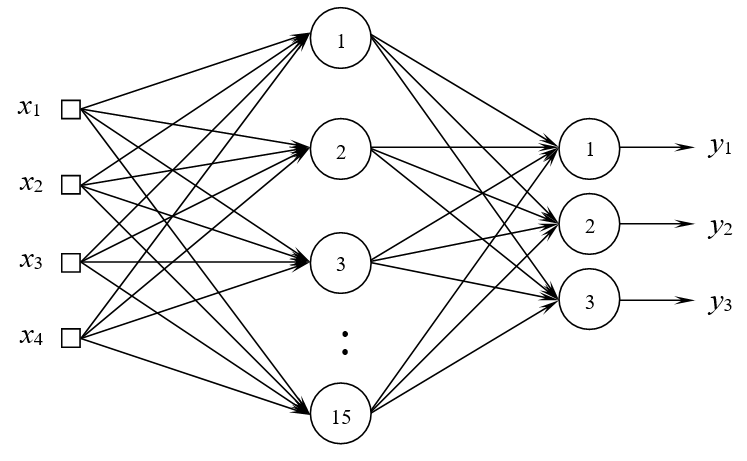


*Fonte*:  SILVA, I.N. – Sistemas Inteligentes – Notas de Aula da disciplina **Redes Neurais Artificiais** – USP São Carlos, 2012

## MLP - inicio

# 2.1 - Configuração dos hiperparâmetros

In [18]:
#CÉLULA MLP-MAIN-01
#IMPLEMENTE O CÓDIGO AQUI - INICIO
#Parâmetros
eta = 0.01
epsilon = 0.000005
nInputs  = 4
nHidden = 15
nOutputs = 3
max_epochs = 10000 
dictLayers = {'nLayers' : 2, 'vLayers' : np.array([nInputs,nHidden, nOutputs])}

# 2.2 - Carga dos dados e execução do treinamento

In [22]:
#CÉLULA MLP-MAIN-02

#IMPLEMENTE O CÓDIGO AQUI - INICIO
# 1 - FAÇA O CARREGAMENTO DOS DADOS
# 2 - SEPARE EM DOIS VETORES DE DADOS: ENTRADAS E SAIDAS
# 3 - EXECUTE O TREINAMENTO E VERIFIQUE A CONVERGÊNCIA

#Carrega dados - Treino
dfTrainingFile = loadDataFile('Lab02_training.csv')
# dfTrainingFile.drop(columns=('Amostra'), inplace=True)

nSamples = len(dfTrainingFile['x1'])

vInputs  = np.array(dfTrainingFile[['x1', 'x2', 'x3', 'x4']])
vOutputs = np.array(dfTrainingFile[['d1', 'd2', 'd3']])

(W_1, W_2, B_1, B_2, MSE) =mlp_train_online(eta, epsilon, vInputs.T, vOutputs.T, dictLayers, max_epochs)

print(W_1)
print('-----------')
print(W_2)

Epoch = 0 - MSE = 0.9962679135162676
Epoch = 1 - MSE = 0.9961540982766538
Epoch = 2 - MSE = 0.9960319412102095
Epoch = 3 - MSE = 0.9959004541885216
Epoch = 4 - MSE = 0.9957584854968579
Epoch = 5 - MSE = 0.9956046845532116
Epoch = 6 - MSE = 0.9954374571116685
Epoch = 7 - MSE = 0.9952549078250205
Epoch = 8 - MSE = 0.9950547658149208
Epoch = 9 - MSE = 0.9948342871035231
Epoch = 10 - MSE = 0.9945901250917532
Epoch = 11 - MSE = 0.9943181562273087
Epoch = 12 - MSE = 0.9940132417607593
Epoch = 13 - MSE = 0.993668896627221
Epoch = 14 - MSE = 0.9932768205392539
Epoch = 15 - MSE = 0.992826219869501
Epoch = 16 - MSE = 0.9923028035132291
Epoch = 17 - MSE = 0.9916872555344014
Epoch = 18 - MSE = 0.9909528394786513
Epoch = 19 - MSE = 0.9900615048973573
Epoch = 20 - MSE = 0.9889572918517514
Epoch = 21 - MSE = 0.9875545972307042
Epoch = 22 - MSE = 0.9857160380495945
Epoch = 23 - MSE = 0.9832075981212552
Epoch = 24 - MSE = 0.9795993709804754
Epoch = 25 - MSE = 0.9740203633407502
Epoch = 26 - MSE = 0.964

Epoch = 214 - MSE = 0.5377442703039446
Epoch = 215 - MSE = 0.5375207795458685
Epoch = 216 - MSE = 0.5372957666979573
Epoch = 217 - MSE = 0.5370692084993572
Epoch = 218 - MSE = 0.53684108023227
Epoch = 219 - MSE = 0.5366113555807244
Epoch = 220 - MSE = 0.5363800064744646
Epoch = 221 - MSE = 0.536147002916163
Epoch = 222 - MSE = 0.5359123127899194
Epoch = 223 - MSE = 0.5356759016487244
Epoch = 224 - MSE = 0.535437732478226
Epoch = 225 - MSE = 0.535197765433751
Epoch = 226 - MSE = 0.5349559575470791
Epoch = 227 - MSE = 0.5347122623989365
Epoch = 228 - MSE = 0.5344666297525488
Epoch = 229 - MSE = 0.5342190051428565
Epoch = 230 - MSE = 0.5339693294151339
Epoch = 231 - MSE = 0.5337175382057108
Epoch = 232 - MSE = 0.5334635613562856
Epoch = 233 - MSE = 0.533207322251843
Epoch = 234 - MSE = 0.5329487370704542
Epoch = 235 - MSE = 0.5326877139311257
Epoch = 236 - MSE = 0.5324241519233316
Epoch = 237 - MSE = 0.5321579399987982
Epoch = 238 - MSE = 0.5318889557023707
Epoch = 239 - MSE = 0.531617063

Epoch = 431 - MSE = 0.19727009857550495
Epoch = 432 - MSE = 0.19682641398855671
Epoch = 433 - MSE = 0.1963871021834001
Epoch = 434 - MSE = 0.195952128944191
Epoch = 435 - MSE = 0.19552145941578916
Epoch = 436 - MSE = 0.19509505815381376
Epoch = 437 - MSE = 0.19467288917310152
Epoch = 438 - MSE = 0.1942549159945686
Epoch = 439 - MSE = 0.19384110169048133
Epoch = 440 - MSE = 0.1934314089281451
Epoch = 441 - MSE = 0.19302580001202232
Epoch = 442 - MSE = 0.19262423692429445
Epoch = 443 - MSE = 0.19222668136388482
Epoch = 444 - MSE = 0.19183309478396302
Epoch = 445 - MSE = 0.19144343842795145
Epoch = 446 - MSE = 0.19105767336405804
Epoch = 447 - MSE = 0.1906757605183623
Epoch = 448 - MSE = 0.19029766070647855
Epoch = 449 - MSE = 0.18992333466382882
Epoch = 450 - MSE = 0.18955274307455158
Epoch = 451 - MSE = 0.18918584659907928
Epoch = 452 - MSE = 0.18882260590041544
Epoch = 453 - MSE = 0.18846298166914371
Epoch = 454 - MSE = 0.18810693464720196
Epoch = 455 - MSE = 0.18775442565045444
Epoch 

Epoch = 639 - MSE = 0.15511718341594724
Epoch = 640 - MSE = 0.15502602791545342
Epoch = 641 - MSE = 0.15493528847726087
Epoch = 642 - MSE = 0.15484496079256965
Epoch = 643 - MSE = 0.15475504059577272
Epoch = 644 - MSE = 0.154665523663841
Epoch = 645 - MSE = 0.15457640581571835
Epoch = 646 - MSE = 0.15448768291172635
Epoch = 647 - MSE = 0.15439935085297957
Epoch = 648 - MSE = 0.15431140558081027
Epoch = 649 - MSE = 0.15422384307620254
Epoch = 650 - MSE = 0.1541366593592361
Epoch = 651 - MSE = 0.15404985048853942
Epoch = 652 - MSE = 0.15396341256075166
Epoch = 653 - MSE = 0.15387734170999404
Epoch = 654 - MSE = 0.15379163410734947
Epoch = 655 - MSE = 0.1537062859603514
Epoch = 656 - MSE = 0.15362129351248094
Epoch = 657 - MSE = 0.15353665304267228
Epoch = 658 - MSE = 0.15345236086482678
Epoch = 659 - MSE = 0.15336841332733483
Epoch = 660 - MSE = 0.15328480681260567
Epoch = 661 - MSE = 0.15320153773660564
Epoch = 662 - MSE = 0.15311860254840348
Epoch = 663 - MSE = 0.15303599772972365
Epoc

Epoch = 853 - MSE = 0.14047305164593507
Epoch = 854 - MSE = 0.14041284265653745
Epoch = 855 - MSE = 0.14035261937217353
Epoch = 856 - MSE = 0.1402923810052766
Epoch = 857 - MSE = 0.14023212677417624
Epoch = 858 - MSE = 0.14017185590303285
Epoch = 859 - MSE = 0.140111567621772
Epoch = 860 - MSE = 0.14005126116601915
Epoch = 861 - MSE = 0.1399909357770335
Epoch = 862 - MSE = 0.1399305907016428
Epoch = 863 - MSE = 0.13987022519217732
Epoch = 864 - MSE = 0.1398098385064044
Epoch = 865 - MSE = 0.13974942990746242
Epoch = 866 - MSE = 0.13968899866379544
Epoch = 867 - MSE = 0.13962854404908726
Epoch = 868 - MSE = 0.139568065342196
Epoch = 869 - MSE = 0.13950756182708848
Epoch = 870 - MSE = 0.13944703279277465
Epoch = 871 - MSE = 0.1393864775332422
Epoch = 872 - MSE = 0.1393258953473913
Epoch = 873 - MSE = 0.13926528553896933
Epoch = 874 - MSE = 0.13920464741650582
Epoch = 875 - MSE = 0.13914398029324743
Epoch = 876 - MSE = 0.13908328348709328
Epoch = 877 - MSE = 0.13902255632053012
Epoch = 87

Epoch = 1063 - MSE = 0.12660010178403378
Epoch = 1064 - MSE = 0.12652447485113327
Epoch = 1065 - MSE = 0.12644872755667327
Epoch = 1066 - MSE = 0.12637285957352482
Epoch = 1067 - MSE = 0.12629687057746083
Epoch = 1068 - MSE = 0.1262207602471976
Epoch = 1069 - MSE = 0.12614452826443667
Epoch = 1070 - MSE = 0.12606817431390716
Epoch = 1071 - MSE = 0.12599169808340807
Epoch = 1072 - MSE = 0.12591509926385097
Epoch = 1073 - MSE = 0.12583837754930297
Epoch = 1074 - MSE = 0.1257615326370297
Epoch = 1075 - MSE = 0.12568456422753876
Epoch = 1076 - MSE = 0.1256074720246235
Epoch = 1077 - MSE = 0.12553025573540672
Epoch = 1078 - MSE = 0.12545291507038456
Epoch = 1079 - MSE = 0.12537544974347103
Epoch = 1080 - MSE = 0.12529785947204233
Epoch = 1081 - MSE = 0.12522014397698136
Epoch = 1082 - MSE = 0.12514230298272297
Epoch = 1083 - MSE = 0.1250643362172985
Epoch = 1084 - MSE = 0.12498624341238132
Epoch = 1085 - MSE = 0.12490802430333198
Epoch = 1086 - MSE = 0.1248296786292439
Epoch = 1087 - MSE = 

Epoch = 1268 - MSE = 0.10844592343977273
Epoch = 1269 - MSE = 0.108345763871957
Epoch = 1270 - MSE = 0.108245528393512
Epoch = 1271 - MSE = 0.10814521782252745
Epoch = 1272 - MSE = 0.10804483298043602
Epoch = 1273 - MSE = 0.10794437469193989
Epoch = 1274 - MSE = 0.10784384378493711
Epoch = 1275 - MSE = 0.10774324109044814
Epoch = 1276 - MSE = 0.10764256744254233
Epoch = 1277 - MSE = 0.10754182367826419
Epoch = 1278 - MSE = 0.1074410106375599
Epoch = 1279 - MSE = 0.10734012916320369
Epoch = 1280 - MSE = 0.10723918010072461
Epoch = 1281 - MSE = 0.10713816429833285
Epoch = 1282 - MSE = 0.1070370826068467
Epoch = 1283 - MSE = 0.10693593587961925
Epoch = 1284 - MSE = 0.10683472497246535
Epoch = 1285 - MSE = 0.10673345074358899
Epoch = 1286 - MSE = 0.10663211405351039
Epoch = 1287 - MSE = 0.1065307157649937
Epoch = 1288 - MSE = 0.10642925674297476
Epoch = 1289 - MSE = 0.1063277378544891
Epoch = 1290 - MSE = 0.10622615996860023
Epoch = 1291 - MSE = 0.10612452395632814
Epoch = 1292 - MSE = 0.1

Epoch = 1478 - MSE = 0.08705490613867507
Epoch = 1479 - MSE = 0.086957285303172
Epoch = 1480 - MSE = 0.086859753726807
Epoch = 1481 - MSE = 0.08676231195723154
Epoch = 1482 - MSE = 0.08666496053902381
Epoch = 1483 - MSE = 0.08656770001368409
Epoch = 1484 - MSE = 0.08647053091963061
Epoch = 1485 - MSE = 0.08637345379219498
Epoch = 1486 - MSE = 0.0862764691636179
Epoch = 1487 - MSE = 0.08617957756304497
Epoch = 1488 - MSE = 0.08608277951652243
Epoch = 1489 - MSE = 0.08598607554699275
Epoch = 1490 - MSE = 0.08588946617429077
Epoch = 1491 - MSE = 0.08579295191513936
Epoch = 1492 - MSE = 0.08569653328314551
Epoch = 1493 - MSE = 0.0856002107887961
Epoch = 1494 - MSE = 0.08550398493945406
Epoch = 1495 - MSE = 0.0854078562393545
Epoch = 1496 - MSE = 0.08531182518960068
Epoch = 1497 - MSE = 0.08521589228816032
Epoch = 1498 - MSE = 0.08512005802986164
Epoch = 1499 - MSE = 0.08502432290638974
Epoch = 1500 - MSE = 0.08492868740628293
Epoch = 1501 - MSE = 0.08483315201492911
Epoch = 1502 - MSE = 0.

Epoch = 1684 - MSE = 0.06938565361269734
Epoch = 1685 - MSE = 0.06931345922205472
Epoch = 1686 - MSE = 0.0692414013086469
Epoch = 1687 - MSE = 0.06916947981514517
Epoch = 1688 - MSE = 0.06909769468217392
Epoch = 1689 - MSE = 0.06902604584832503
Epoch = 1690 - MSE = 0.0689545332501724
Epoch = 1691 - MSE = 0.06888315682228603
Epoch = 1692 - MSE = 0.06881191649724663
Epoch = 1693 - MSE = 0.06874081220565992
Epoch = 1694 - MSE = 0.0686698438761712
Epoch = 1695 - MSE = 0.06859901143547976
Epoch = 1696 - MSE = 0.06852831480835304
Epoch = 1697 - MSE = 0.06845775391764156
Epoch = 1698 - MSE = 0.06838732868429317
Epoch = 1699 - MSE = 0.06831703902736737
Epoch = 1700 - MSE = 0.0682468848640501
Epoch = 1701 - MSE = 0.06817686610966804
Epoch = 1702 - MSE = 0.06810698267770318
Epoch = 1703 - MSE = 0.06803723447980727
Epoch = 1704 - MSE = 0.06796762142581646
Epoch = 1705 - MSE = 0.06789814342376559
Epoch = 1706 - MSE = 0.0678288003799029
Epoch = 1707 - MSE = 0.06775959219870435
Epoch = 1708 - MSE = 

Epoch = 1891 - MSE = 0.057157546920794555
Epoch = 1892 - MSE = 0.057110411498139335
Epoch = 1893 - MSE = 0.05706337623802169
Epoch = 1894 - MSE = 0.057016440922028816
Epoch = 1895 - MSE = 0.056969605331857257
Epoch = 1896 - MSE = 0.056922869249317234
Epoch = 1897 - MSE = 0.0568762324563372
Epoch = 1898 - MSE = 0.056829694734967996
Epoch = 1899 - MSE = 0.056783255867387195
Epoch = 1900 - MSE = 0.05673691563590335
Epoch = 1901 - MSE = 0.05669067382296016
Epoch = 1902 - MSE = 0.05664453021114063
Epoch = 1903 - MSE = 0.056598484583171106
Epoch = 1904 - MSE = 0.05655253672192544
Epoch = 1905 - MSE = 0.05650668641042879
Epoch = 1906 - MSE = 0.05646093343186177
Epoch = 1907 - MSE = 0.05641527756956426
Epoch = 1908 - MSE = 0.05636971860703923
Epoch = 1909 - MSE = 0.05632425632795662
Epoch = 1910 - MSE = 0.05627889051615715
Epoch = 1911 - MSE = 0.056233620955655934
Epoch = 1912 - MSE = 0.056188447430646174
Epoch = 1913 - MSE = 0.05614336972550296
Epoch = 1914 - MSE = 0.056098387624786555
Epoch 

Epoch = 2095 - MSE = 0.049327673738504024
Epoch = 2096 - MSE = 0.04929680182888275
Epoch = 2097 - MSE = 0.049265991345126464
Epoch = 2098 - MSE = 0.04923524213435695
Epoch = 2099 - MSE = 0.049204554044072674
Epoch = 2100 - MSE = 0.04917392692214856
Epoch = 2101 - MSE = 0.04914336061683518
Epoch = 2102 - MSE = 0.049112854976758824
Epoch = 2103 - MSE = 0.04908240985092095
Epoch = 2104 - MSE = 0.04905202508869765
Epoch = 2105 - MSE = 0.049021700539839376
Epoch = 2106 - MSE = 0.04899143605447046
Epoch = 2107 - MSE = 0.04896123148308881
Epoch = 2108 - MSE = 0.04893108667656532
Epoch = 2109 - MSE = 0.048901001486143555
Epoch = 2110 - MSE = 0.04887097576343924
Epoch = 2111 - MSE = 0.04884100936043988
Epoch = 2112 - MSE = 0.048811102129504215
Epoch = 2113 - MSE = 0.048781253923361904
Epoch = 2114 - MSE = 0.04875146459511293
Epoch = 2115 - MSE = 0.04872173399822724
Epoch = 2116 - MSE = 0.04869206198654424
Epoch = 2117 - MSE = 0.04866244841427222
Epoch = 2118 - MSE = 0.04863289313598798
Epoch = 

Epoch = 2294 - MSE = 0.04421911997926039
Epoch = 2295 - MSE = 0.04419791283915543
Epoch = 2296 - MSE = 0.044176743387977745
Epoch = 2297 - MSE = 0.04415561153596949
Epoch = 2298 - MSE = 0.044134517193621554
Epoch = 2299 - MSE = 0.044113460271672914
Epoch = 2300 - MSE = 0.044092440681109964
Epoch = 2301 - MSE = 0.04407145833316578
Epoch = 2302 - MSE = 0.04405051313931954
Epoch = 2303 - MSE = 0.044029605011295846
Epoch = 2304 - MSE = 0.04400873386106401
Epoch = 2305 - MSE = 0.04398789960083742
Epoch = 2306 - MSE = 0.043967102143072784
Epoch = 2307 - MSE = 0.04394634140046963
Epoch = 2308 - MSE = 0.04392561728596949
Epoch = 2309 - MSE = 0.0439049297127553
Epoch = 2310 - MSE = 0.04388427859425076
Epoch = 2311 - MSE = 0.043863663844119584
Epoch = 2312 - MSE = 0.04384308537626498
Epoch = 2313 - MSE = 0.04382254310482886
Epoch = 2314 - MSE = 0.04380203694419127
Epoch = 2315 - MSE = 0.043781566808969635
Epoch = 2316 - MSE = 0.04376113261401819
Epoch = 2317 - MSE = 0.04374073427442731
Epoch = 2

Epoch = 2498 - MSE = 0.04056375677373834
Epoch = 2499 - MSE = 0.040548682566248065
Epoch = 2500 - MSE = 0.04053363203265181
Epoch = 2501 - MSE = 0.04051860512169972
Epoch = 2502 - MSE = 0.040503601782279325
Epoch = 2503 - MSE = 0.04048862196341504
Epoch = 2504 - MSE = 0.04047366561426788
Epoch = 2505 - MSE = 0.040458732684134996
Epoch = 2506 - MSE = 0.04044382312244921
Epoch = 2507 - MSE = 0.04042893687877869
Epoch = 2508 - MSE = 0.040414073902826496
Epoch = 2509 - MSE = 0.040399234144430286
Epoch = 2510 - MSE = 0.04038441755356164
Epoch = 2511 - MSE = 0.040369624080325996
Epoch = 2512 - MSE = 0.040354853674962006
Epoch = 2513 - MSE = 0.04034010628784128
Epoch = 2514 - MSE = 0.04032538186946785
Epoch = 2515 - MSE = 0.040310680370477914
Epoch = 2516 - MSE = 0.04029600174163934
Epoch = 2517 - MSE = 0.04028134593385133
Epoch = 2518 - MSE = 0.04026671289814397
Epoch = 2519 - MSE = 0.04025210258567785
Epoch = 2520 - MSE = 0.04023751494774374
Epoch = 2521 - MSE = 0.040222949935762156
Epoch =

Epoch = 2700 - MSE = 0.03793825895840796
Epoch = 2701 - MSE = 0.03792708762138197
Epoch = 2702 - MSE = 0.03791593191140755
Epoch = 2703 - MSE = 0.037904791798083
Epoch = 2704 - MSE = 0.03789366725108175
Epoch = 2705 - MSE = 0.03788255824015234
Epoch = 2706 - MSE = 0.03787146473511805
Epoch = 2707 - MSE = 0.0378603867058767
Epoch = 2708 - MSE = 0.03784932412240054
Epoch = 2709 - MSE = 0.03783827695473587
Epoch = 2710 - MSE = 0.03782724517300296
Epoch = 2711 - MSE = 0.037816228747395826
Epoch = 2712 - MSE = 0.03780522764818188
Epoch = 2713 - MSE = 0.03779424184570187
Epoch = 2714 - MSE = 0.03778327131036959
Epoch = 2715 - MSE = 0.03777231601267168
Epoch = 2716 - MSE = 0.03776137592316743
Epoch = 2717 - MSE = 0.037750451012488515
Epoch = 2718 - MSE = 0.03773954125133887
Epoch = 2719 - MSE = 0.03772864661049445
Epoch = 2720 - MSE = 0.037717767060802945
Epoch = 2721 - MSE = 0.03770690257318367
Epoch = 2722 - MSE = 0.03769605311862732
Epoch = 2723 - MSE = 0.037685218668195776
Epoch = 2724 - 

Epoch = 2907 - MSE = 0.0359196753633083
Epoch = 2908 - MSE = 0.035911185816339376
Epoch = 2909 - MSE = 0.03590270693312188
Epoch = 2910 - MSE = 0.03589423869501613
Epoch = 2911 - MSE = 0.03588578108342427
Epoch = 2912 - MSE = 0.03587733407979018
Epoch = 2913 - MSE = 0.0358688976655995
Epoch = 2914 - MSE = 0.0358604718223793
Epoch = 2915 - MSE = 0.03585205653169815
Epoch = 2916 - MSE = 0.035843651775165915
Epoch = 2917 - MSE = 0.035835257534433666
Epoch = 2918 - MSE = 0.03582687379119352
Epoch = 2919 - MSE = 0.03581850052717864
Epoch = 2920 - MSE = 0.035810137724163034
Epoch = 2921 - MSE = 0.03580178536396145
Epoch = 2922 - MSE = 0.03579344342842931
Epoch = 2923 - MSE = 0.03578511189946254
Epoch = 2924 - MSE = 0.03577679075899754
Epoch = 2925 - MSE = 0.03576847998901097
Epoch = 2926 - MSE = 0.03576017957151978
Epoch = 2927 - MSE = 0.035751889488580914
Epoch = 2928 - MSE = 0.03574360972229142
Epoch = 2929 - MSE = 0.03573534025478812
Epoch = 2930 - MSE = 0.0357270810682477
Epoch = 2931 - 

Epoch = 3110 - MSE = 0.034391925148078456
Epoch = 3111 - MSE = 0.03438526874977574
Epoch = 3112 - MSE = 0.03437861995495618
Epoch = 3113 - MSE = 0.034371978751561054
Epoch = 3114 - MSE = 0.03436534512755604
Epoch = 3115 - MSE = 0.03435871907093154
Epoch = 3116 - MSE = 0.03435210056970241
Epoch = 3117 - MSE = 0.03434548961190791
Epoch = 3118 - MSE = 0.03433888618561177
Epoch = 3119 - MSE = 0.03433229027890193
Epoch = 3120 - MSE = 0.034325701879890695
Epoch = 3121 - MSE = 0.03431912097671453
Epoch = 3122 - MSE = 0.03431254755753403
Epoch = 3123 - MSE = 0.03430598161053389
Epoch = 3124 - MSE = 0.03429942312392282
Epoch = 3125 - MSE = 0.034292872085933485
Epoch = 3126 - MSE = 0.03428632848482246
Epoch = 3127 - MSE = 0.03427979230887014
Epoch = 3128 - MSE = 0.03427326354638072
Epoch = 3129 - MSE = 0.034266742185682146
Epoch = 3130 - MSE = 0.03426022821512595
Epoch = 3131 - MSE = 0.03425372162308736
Epoch = 3132 - MSE = 0.03424722239796506
Epoch = 3133 - MSE = 0.034240730528181294
Epoch = 31

Epoch = 3313 - MSE = 0.03318154330052844
Epoch = 3314 - MSE = 0.03317621321085981
Epoch = 3315 - MSE = 0.033170888707973724
Epoch = 3316 - MSE = 0.03316556978375963
Epoch = 3317 - MSE = 0.03316025643012205
Epoch = 3318 - MSE = 0.03315494863898065
Epoch = 3319 - MSE = 0.03314964640227021
Epoch = 3320 - MSE = 0.03314434971194043
Epoch = 3321 - MSE = 0.033139058559956004
Epoch = 3322 - MSE = 0.03313377293829671
Epoch = 3323 - MSE = 0.0331284928389571
Epoch = 3324 - MSE = 0.0331232182539467
Epoch = 3325 - MSE = 0.03311794917528987
Epoch = 3326 - MSE = 0.03311268559502574
Epoch = 3327 - MSE = 0.033107427505208314
Epoch = 3328 - MSE = 0.03310217489790629
Epoch = 3329 - MSE = 0.033096927765203094
Epoch = 3330 - MSE = 0.03309168609919681
Epoch = 3331 - MSE = 0.03308644989200024
Epoch = 3332 - MSE = 0.03308121913574077
Epoch = 3333 - MSE = 0.03307599382256034
Epoch = 3334 - MSE = 0.033070773944615474
Epoch = 3335 - MSE = 0.033065559494077204
Epoch = 3336 - MSE = 0.03306035046313105
Epoch = 3337

# 2.3 - Verificação dos resultados do treinamento

Dado que o problema se configura como um típico processo de classificação de padrões, implemente a rotina que faz o pós-processamento das saídas fornecidas pela rede (números reais) para números inteiros. Utilize o critério do arredondamento simétrico, isto é:

$ y_i^{pos} = 1$ se $y_i \geq 0.5 $

$ y_i^{pos} = 0$ se $y_i < 0.5 $

utilizado apenas no pós-processamento do conjunto de teste. 

In [31]:
#Verifica resultados
#IMPLEMENTE O CÓDIGO AQUI - INICIO
# EXECUTE A OPERAÇÃO COM OS DADOS DE TREINAMENTO E VERIFIQUE O RESULTADO 
#PLOTANDO UM GRÁFICO ENTRE OS DADOS DE PREDIÇÃO VERSUS OS DADOS ESPERADOS
y_pred = mlp_operation(vInputs.T, [W_1, W_2], [B_1, B_2])

#Pos-processamento
y_pred[y_pred >= 0.5] = 1.0
y_pred[y_pred < 0.5] = 0

y_pred = y_pred.astype(int)
#print(y_pred)

results = vOutputs == y_pred.T

results2 = np.sum(results, axis=1)
results2 = results2 == 3

accuracy = np.sum(results2) / len(results2) * 100

print(accuracy)

95.38461538461539


# 2.4 - Verificação dos resultados de TESTE

In [34]:
#Carrega dados - Teste
#IMPLEMENTE O CÓDIGO AQUI - INICIO
# EXECUTE A OPERAÇÃO COM OS DADOS DE TESTE E VERIFIQUE O RESULTADO 
#PLOTANDO UM GRÁFICO ENTRE OS DADOS DE PREDIÇÃO VERSUS OS DADOS ESPERADOS
dfTestFile = loadDataFile('Lab02_operation.csv')

nSamples = len(dfTestFile['x1'])

vInputs = np.array(dfTestFile[['x1','x2','x3','x4']])
vOutputs = np.array(dfTestFile[['d1','d2','d3']])

y_pred = mlp_operation(vInputs.T, [W_1, W_2],[B_1, B_2])

print(y_pred)
print('-------')
print(vOutputs)

[[7.83858182e-06 9.95460657e-01 7.77978757e-06 1.81603300e-02
  5.44186849e-05 9.05662113e-01 6.25642271e-03 2.42397367e-03
  9.53233035e-01 9.83637754e-01 2.09190580e-03 9.66674892e-01
  4.26757780e-06 6.69369180e-06 3.41500781e-06 9.78447378e-01
  1.06785365e-04 5.41747527e-03]
 [3.71653559e-02 2.52471352e-02 4.14511207e-02 8.98038814e-01
  2.28885883e-01 1.19981966e-01 9.05272024e-01 8.76995110e-01
  8.41152617e-02 3.51862787e-02 8.56803952e-01 5.40749578e-02
  2.42956612e-02 3.40607067e-02 1.85041140e-02 5.52217343e-02
  2.74873484e-01 8.77744841e-01]
 [9.86009782e-01 2.64489288e-06 9.85444483e-01 6.52272736e-03
  8.50096215e-01 3.33557958e-05 1.75945056e-02 4.69922593e-02
  1.71878910e-05 7.94073689e-06 5.56598975e-02 1.38970831e-05
  9.93023228e-01 9.88249171e-01 9.95035689e-01 8.37866153e-06
  7.41216159e-01 2.16175691e-02]]
-------
[[0 0 1]
 [1 0 0]
 [0 0 1]
 [0 1 0]
 [0 0 1]
 [1 0 0]
 [0 1 0]
 [0 1 0]
 [1 0 0]
 [1 0 0]
 [0 1 0]
 [1 0 0]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [1 0 0]
 [0 